In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import api_key

Nashville Restaurants

In [2]:
# adding API results to a dataframe

url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': f'Bearer {api_key}'}
nashville_params = {
    'latitude': 36.1627,
    'longitude': -86.7816,
    'radius': 10000,
    'categories': 'restaurants',
    'limit': 50
}

nashville_response = requests.get(url, headers=headers, params=nashville_params)

# creating empty lists for data frame
nashville_results = {'Name': [], 'Rating': [], 'Pricing': [], 'Number of Reviews': []}

# Check if the response was successful
if nashville_response.status_code == 200:
    # Parse the JSON response
    nashville_data = nashville_response.json().get('businesses', [])
    
    # Loop through each restaurant
    for n in nashville_data:
        nashville_results['Name'].append(n['name'])
        nashville_results['Rating'].append(n['rating'])
        # Check if 'price' key exists in the data
        if 'price' in n:
            nashville_results['Pricing'].append(len(n['price']))
        else:
            nashville_results['Pricing'].append('N/A')
        nashville_results['Number of Reviews'].append(n['review_count'])
        
nashville_restaurant_info_df = pd.DataFrame(nashville_results)

nashville_restaurant_info_df.to_csv('raw_data/nashville-restaurant-info.csv', index=False)

nashville_restaurant_info_df.head()

,Name,Rating,Pricing,Number of Reviews
0,The Stillery,4.4,N/A,3427
1,Puckett's Restaurant - Nashville,3.9,N/A,3292
2,Sixty Vines,4.5,N/A,946
3,The Twelve Thirty Club,4.3,N/A,793
4,5th & Taylor,4.4,N/A,1388


In [3]:
# creating dataframe of restaurant categories
nashville_category_results = {'Name': [], 'Category': [], 'Pricing': []}

# Check if the response was successful
if nashville_response.status_code == 200:

    # Loop through each restaurant
    for n in nashville_data:
        nashville_category_results['Name'].append(n['name'])
        nashville_category_results['Category'].append(n['categories'][0]['title'])
        if 'price' in n:
            nashville_category_results['Pricing'].append(len(n['price']))
        else:
            nashville_category_results['Pricing'].append('N/A')
        
nashville_category_df = pd.DataFrame(nashville_category_results)

nashville_category_df.to_csv('raw_data/nashville-restaurant-categories.csv', index=False)

nashville_category_df.head()


,Name,Category,Pricing
0,The Stillery,New American,N/A
1,Puckett's Restaurant - Nashville,American,N/A
2,Sixty Vines,New American,N/A
3,The Twelve Thirty Club,Cocktail Bars,N/A
4,5th & Taylor,New American,N/A


Franklin Restaurants

In [4]:
# adding API results to a dataframe

franklin_params = {
    'latitude': 35.9250,
    'longitude': -86.8697,
    'radius': 10000,
    'categories': 'restaurants',
    'limit': 50
}

franklin_response = requests.get(url, headers=headers, params=franklin_params)

# creating empty lists for data frame
franklin_results = {'Name': [], 'Rating': [], 'Pricing': [], 'Number of Reviews': []}

# Check if the response was successful
if franklin_response.status_code == 200:
    # Parse the JSON response
    franklin_data = franklin_response.json().get('businesses', [])
    
    # Loop through each restaurant
    for f in franklin_data:
        franklin_results['Name'].append(f['name'])
        franklin_results['Rating'].append(f['rating'])
        # Check if 'price' key exists in the data
        if 'price' in f:
            franklin_results['Pricing'].append(len(f['price']))
        else:
            franklin_results['Pricing'].append('N/A')
        franklin_results['Number of Reviews'].append(f['review_count'])
        
franklin_restaurant_info_df = pd.DataFrame(franklin_results)

franklin_restaurant_info_df.to_csv('raw_data/franklin-restaurant-info.csv', index=False)

franklin_restaurant_info_df.head()

,Name,Rating,Pricing,Number of Reviews
0,Cork & Cow,4.3,N/A,323
1,GRAY'S On Main,3.7,N/A,683
2,Red Pony,4.4,N/A,552
3,O' Be Joyful,4.1,N/A,119
4,Puckett's Grocery & Restaurant,4.2,N/A,1119


In [5]:
# creating dataframe of restaurant categories
franklin_category_results = {'Name': [], 'Category': [], 'Pricing': []}

# Check if the response was successful
if franklin_response.status_code == 200:

    # Loop through each restaurant
    for f in franklin_data:
        franklin_category_results['Name'].append(f['name'])
        franklin_category_results['Category'].append(f['categories'][0]['title'])
        if 'price' in f:
            franklin_category_results['Pricing'].append(len(f['price']))
        else:
            franklin_category_results['Pricing'].append('N/A')
        
franklin_category_df = pd.DataFrame(franklin_category_results)

franklin_category_df.to_csv('raw_data/franklin-restaurant-categories.csv', index=False)

franklin_category_df.head()


,Name,Category,Pricing
0,Cork & Cow,Steakhouses,N/A
1,GRAY'S On Main,Bars,N/A
2,Red Pony,American,N/A
3,O' Be Joyful,Burgers,N/A
4,Puckett's Grocery & Restaurant,Barbeque,N/A


Portland, TN Restaurants

In [6]:
# adding API results to a dataframe

portland_params = {
    'latitude': 36.5801,
    'longitude': -86.5139,
    'radius': 10000,
    'categories': 'restaurants',
    'limit': 50
}

portland_response = requests.get(url, headers=headers, params=portland_params)

# creating empty lists for data frame
portland_results = {'Name': [], 'Rating': [], 'Pricing': [], 'Number of Reviews': []}

# Check if the response was successful
if portland_response.status_code == 200:
    # Parse the JSON response
    portland_data = portland_response.json().get('businesses', [])
    
    # Loop through each restaurant
    for p in portland_data:
        portland_results['Name'].append(p['name'])
        portland_results['Rating'].append(p['rating'])
        # Check if 'price' key exists in the data
        if 'price' in p:
            portland_results['Pricing'].append(len(p['price']))
        else:
            portland_results['Pricing'].append('N/A')
        portland_results['Number of Reviews'].append(p['review_count'])
        
portland_restaurant_info_df = pd.DataFrame(portland_results)

portland_restaurant_info_df.to_csv('raw_data/portland-restaurant-info.csv', index=False)

portland_restaurant_info_df.head()

,Name,Rating,Pricing,Number of Reviews
0,Milo Cafe,4.7,N/A,29
1,El Azteca Mexican Restaurant,3.4,N/A,21
2,Portland Pizza & Pub,4.3,N/A,28
3,Senor Fajitas,4.0,N/A,42
4,Tacos Mi Jalisco,4.8,N/A,17


In [7]:
# creating dataframe of restaurant categories
portland_category_results = {'Name': [], 'Category': [], 'Pricing': []}

# Check if the response was successful
if portland_response.status_code == 200:

    # Loop through each restaurant
    for p in portland_data:
        portland_category_results['Name'].append(p['name'])
        portland_category_results['Category'].append(p['categories'][0]['title'])
        if 'price' in p:
            portland_category_results['Pricing'].append(len(p['price']))
        else:
            portland_category_results['Pricing'].append('N/A')
        
portland_category_df = pd.DataFrame(portland_category_results)

portland_category_df.to_csv('raw_data/portland-restaurant-categories.csv', index=False)

portland_category_df.head()


,Name,Category,Pricing
0,Milo Cafe,Cafes,N/A
1,El Azteca Mexican Restaurant,Mexican,N/A
2,Portland Pizza & Pub,Pizza,N/A
3,Senor Fajitas,Mexican,N/A
4,Tacos Mi Jalisco,Mexican,N/A


Data Cleaning

In [8]:
#Reading Recently created City CSV files
Nashville_Restaurant=pd.read_csv("raw_data/nashville-restaurant-categories.csv")
Portland_Resaurant=pd.read_csv("raw_data/portland-restaurant-categories.csv")
Franklin_Resaurant=pd.read_csv("raw_data/franklin-restaurant-categories.csv")

In [9]:
# Adding the column 'Location' to each DataFrame to distinguish between Nashville and Portland data
Nashville_Restaurant['Location'] = 'Nashville'
Portland_Resaurant['Location'] = 'Portland'

# Concatenate the two DataFrames
merged_data = pd.merge(Nashville_Restaurant, Portland_Resaurant, how='outer')


merged_data

,Name,Category,Pricing,Location
0,The Stillery,New American,NaN,Nashville
1,Puckett's Restaurant - Nashville,American,NaN,Nashville
2,Sixty Vines,New American,NaN,Nashville
3,The Twelve Thirty Club,Cocktail Bars,NaN,Nashville
4,5th & Taylor,New American,NaN,Nashville
...,...,...,...,...
88,Denny's,Diners,NaN,Portland
89,Burger King,Burgers,NaN,Portland
90,Jims Barbeque,Barbeque,NaN,Portland
91,Quiznos,Sandwiches,NaN,Portland


In [25]:
#Adding Franklin DataFrame

Franklin_Resaurant['Location']="Franklin"

restaurant_Category=pd.merge(merged_data, Franklin_Resaurant, how='outer')

#Drop Duplicate Name data
restaurant_Category = restaurant_Category.drop_duplicates(subset='Name')

#Dropping empty data
#restaurant_Category = restaurant_Category.dropna(subset=['Pricing'])

restaurant_Category

,Name,Category,Pricing,Location
0,The Stillery,New American,NaN,Nashville
1,Puckett's Restaurant - Nashville,American,NaN,Nashville
2,Sixty Vines,New American,NaN,Nashville
3,The Twelve Thirty Club,Cocktail Bars,NaN,Nashville
4,5th & Taylor,New American,NaN,Nashville
...,...,...,...,...
138,Sopapilla's,Mexican,NaN,Franklin
139,Bestia Mare,Italian,NaN,Franklin
140,Party Fowl - Cool Springs,Southern,NaN,Franklin
141,Mi Kitchen,Tapas Bars,NaN,Franklin


In [26]:
#Dropping pricing column
restaurant_Category = restaurant_Category.drop('Pricing',axis=1)

restaurant_Category

,Name,Category,Location
0,The Stillery,New American,Nashville
1,Puckett's Restaurant - Nashville,American,Nashville
2,Sixty Vines,New American,Nashville
3,The Twelve Thirty Club,Cocktail Bars,Nashville
4,5th & Taylor,New American,Nashville
...,...,...,...
138,Sopapilla's,Mexican,Franklin
139,Bestia Mare,Italian,Franklin
140,Party Fowl - Cool Springs,Southern,Franklin
141,Mi Kitchen,Tapas Bars,Franklin


In [27]:
#Reading Restaurant info CSV
nashville_info=pd.read_csv("raw_data/nashville-restaurant-info.csv")
portland_info=pd.read_csv("raw_data/portland-restaurant-info.csv")
franklin_info=pd.read_csv("raw_data/franklin-restaurant-info.csv")

In [28]:
# Adding a column 'Location' to each DataFrame to distinguish between Nashville and Portland data
nashville_info['Location'] = 'Nashville'
portland_info['Location'] = 'Portland'

# Concatenate the two DataFrames
merged_data2= pd.merge(nashville_info,portland_info, how='outer')

#dropping empty data
# merged_data2 = merged_data2.dropna(subset=['Rating', 'Pricing', 'Number of Reviews'], how='all')



merged_data2

,Name,Rating,Pricing,Number of Reviews,Location
0,The Stillery,4.4,NaN,3427,Nashville
1,Puckett's Restaurant - Nashville,3.9,NaN,3292,Nashville
2,Sixty Vines,4.5,NaN,946,Nashville
3,The Twelve Thirty Club,4.3,NaN,793,Nashville
4,5th & Taylor,4.4,NaN,1388,Nashville
...,...,...,...,...,...
88,Burger King,3.2,NaN,11,Portland
89,McDonald's,1.6,NaN,32,Portland
90,Jims Barbeque,5.0,NaN,1,Portland
91,Quiznos,1.2,NaN,6,Portland


In [18]:
#Adding Frankling dataframe to the recently created DF
franklin_info['Location']="Franklin"

restaurant_info=pd.merge(merged_data2,franklin_info, how='outer')

# Dropping Duplicate Name 
restaurant_info = restaurant_info.drop_duplicates(subset='Name')

# Dropping empty data
#restaurant_info = restaurant_info.dropna(subset=['Pricing'])

restaurant_info

,Name,Rating,Pricing,Number of Reviews,Location
0,The Stillery,4.4,NaN,3427,Nashville
1,Puckett's Restaurant - Nashville,3.9,NaN,3292,Nashville
2,Sixty Vines,4.5,NaN,946,Nashville
3,The Twelve Thirty Club,4.3,NaN,793,Nashville
4,5th & Taylor,4.4,NaN,1388,Nashville
...,...,...,...,...,...
138,Sopapilla's,3.9,NaN,800,Franklin
139,Bestia Mare,3.9,NaN,34,Franklin
140,Party Fowl - Cool Springs,4.1,NaN,385,Franklin
141,Mi Kitchen,4.8,NaN,138,Franklin


In [19]:
# Merging Resuaurant_info and Resturant_Category into a single DF
merged_info_category = pd.merge(restaurant_info, restaurant_Category, how='outer')

merged_info_category.to_csv('clean_data/merged_info_category.csv', index=False)

In [16]:
#Exporting cvs of both restaurant_Category and restaurant_info dataframes
restaurant_Category.to_csv('clean_data/restaurant_Category.csv', index=False)
restaurant_info.to_csv('clean_data/restaurant_info.csv', index=False)

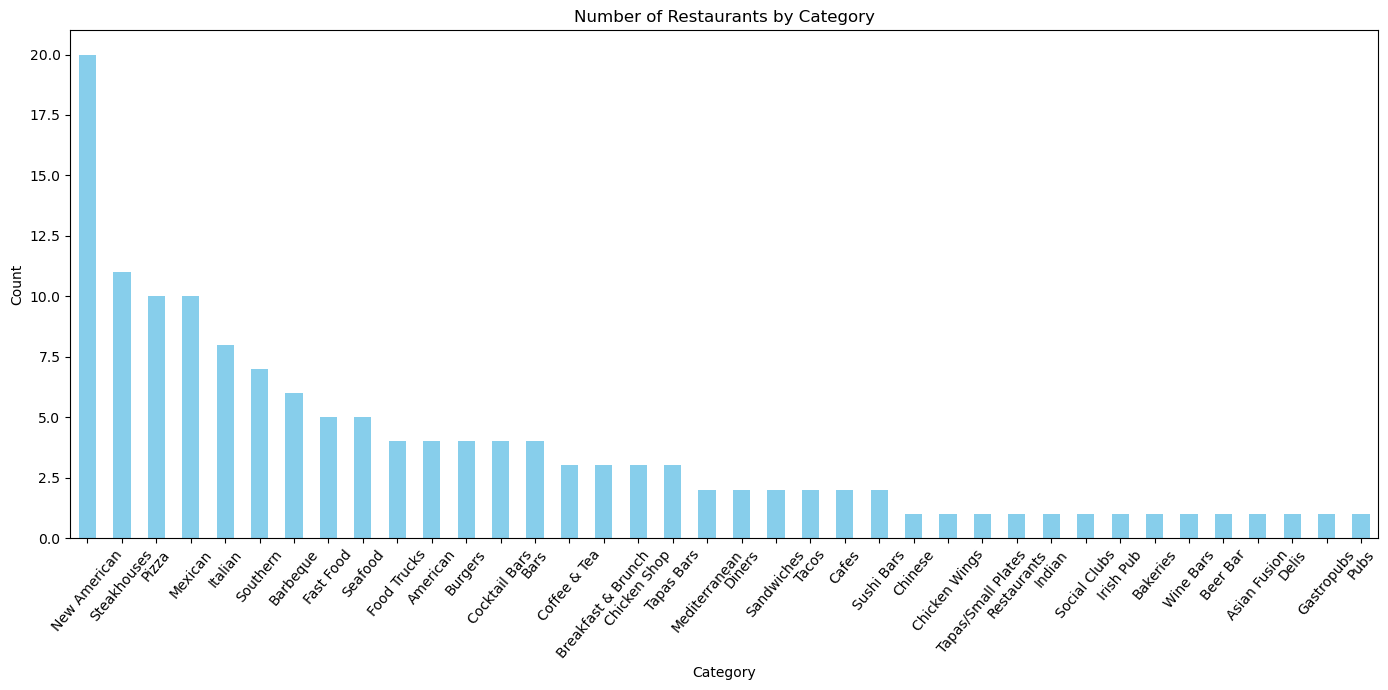

In [29]:
#Bar Graph showing Number of Restaurants by Category 
category_counts = restaurant_Category['Category'].value_counts()

# Plotting
plt.figure(figsize=(14, 7))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Restaurants by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

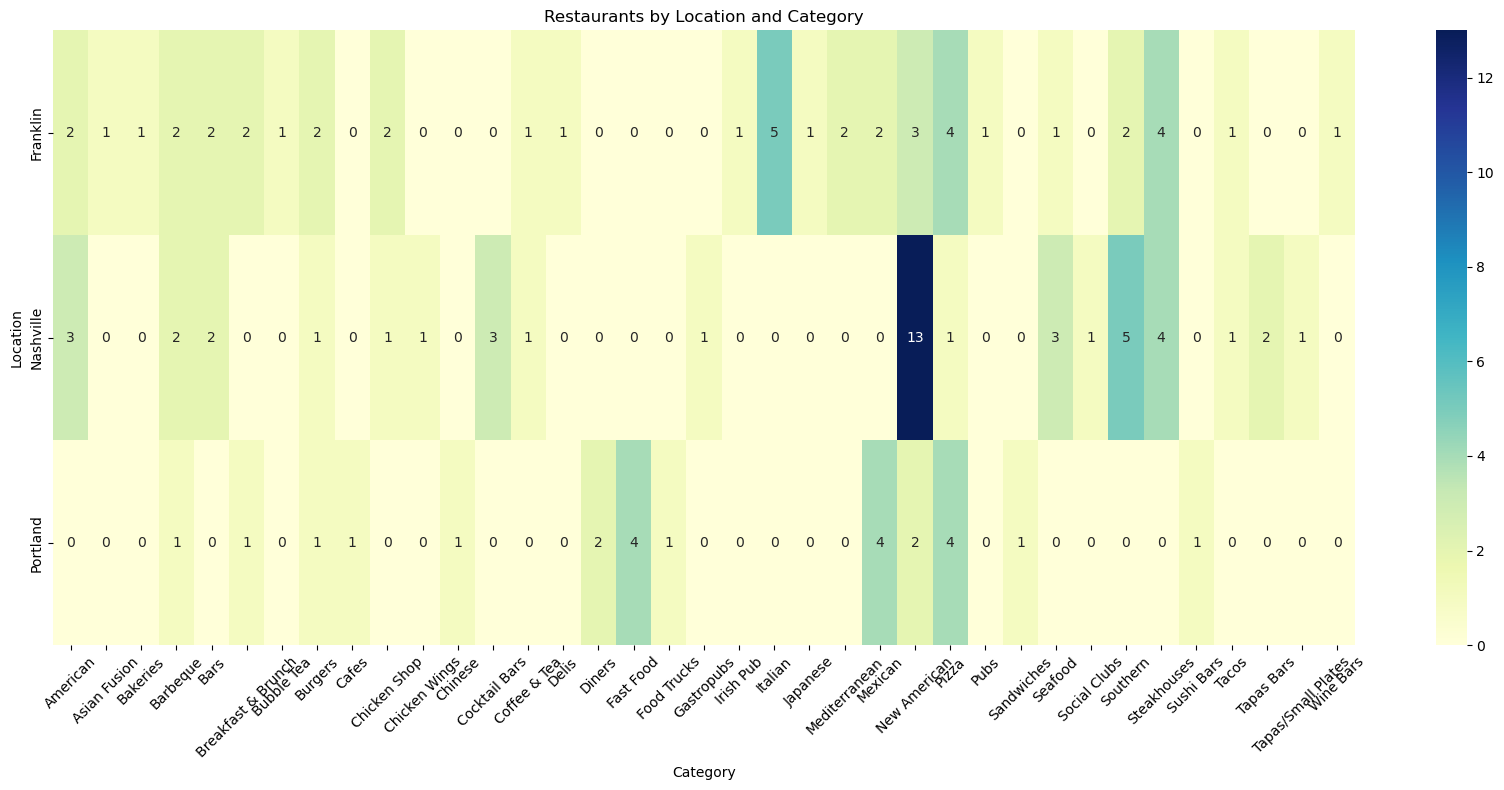

In [ ]:
#Heat Map
pivot_table = restaurant_Category.pivot_table(index='Location', columns='Category', aggfunc='size', fill_value=0)

# Plotting
plt.figure(figsize=(17, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Restaurants by Location and Category')
plt.xlabel('Category')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

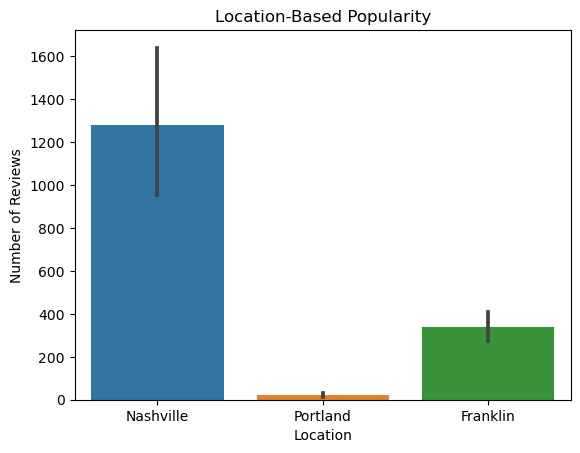

In [21]:
# Bar plot of the Number of Reviews per Location
sns.barplot(data=restaurant_info, x='Location', y='Number of Reviews')
plt.title('Location-Based Popularity')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.show()

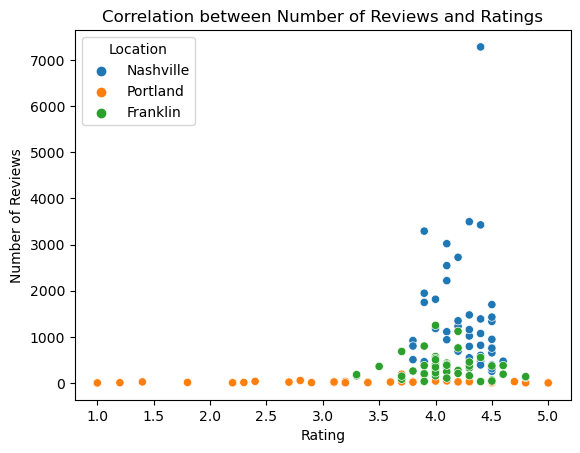

In [22]:
# Scatter plot for Number of Reviews and Ratings
sns.scatterplot(data=restaurant_info, x='Rating', y='Number of Reviews', hue='Location')
plt.title('Correlation between Number of Reviews and Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

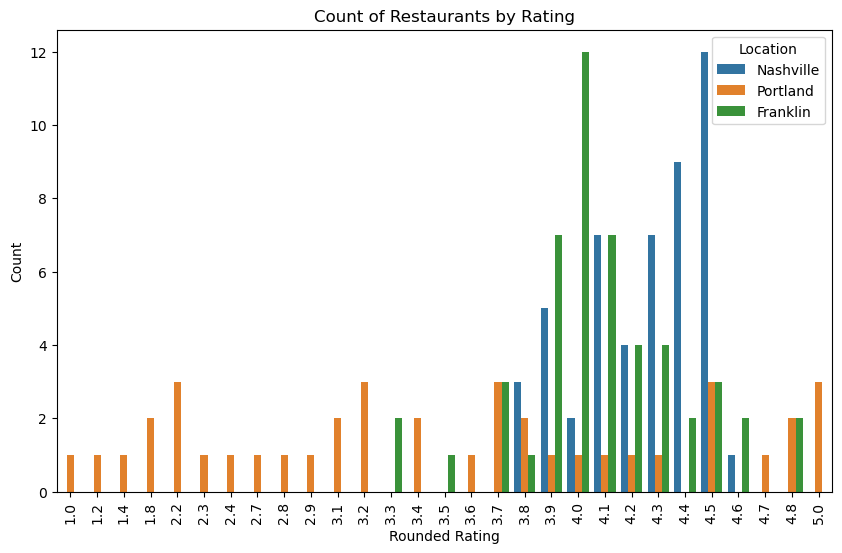

In [23]:
# Count of Restaurants by Rating
plt.figure(figsize=(10, 6))

# Round ratings to the nearest half-point for clarity#Count of Restaurants by
restaurant_info['Rounded Rating'] = restaurant_info['Rating'].round(1)

# Count of Restaurants by Rating
sns.countplot(data=restaurant_info, x='Rounded Rating', hue='Location')
plt.title('Count of Restaurants by Rating')
plt.xticks(rotation=90)  # Rotate the x labels to show them horizontally
plt.xlabel('Rounded Rating')
plt.ylabel('Count')
plt.legend(title='Location')
plt.show()